In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [77]:
df = pd.read_csv("/Users/ayeshasaeed/Documents/Spring 2024/QTM 347 ML/archive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [11]:
df.shape

(70692, 22)

In [12]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

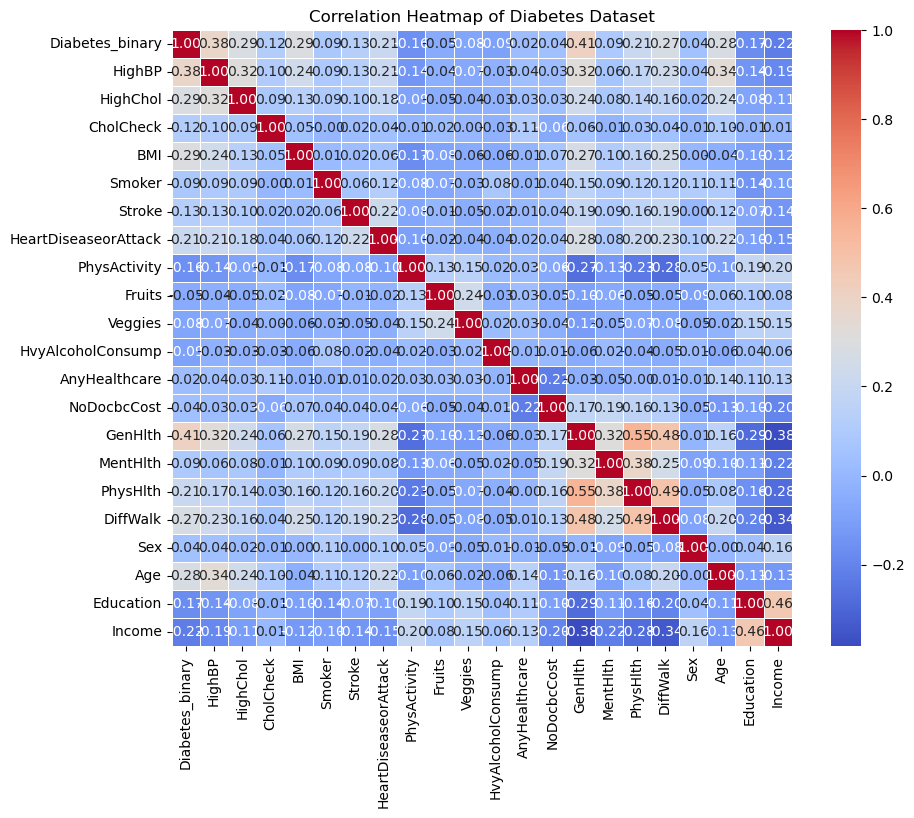

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and target variable (y)
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data: scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the k-NN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7098804724520829

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70      7090
         1.0       0.70      0.74      0.72      7049

    accuracy                           0.71     14139
   macro avg       0.71      0.71      0.71     14139
weighted avg       0.71      0.71      0.71     14139



In [8]:
from sklearn.neighbors import KNeighborsRegressor
n_neighbors = range(1,14)
for i, n in enumerate(n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = knn.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(n)
    print("Accuracy:", accuracy)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

1
Accuracy: 0.6613621896880968

Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66      7090
         1.0       0.66      0.66      0.66      7049

    accuracy                           0.66     14139
   macro avg       0.66      0.66      0.66     14139
weighted avg       0.66      0.66      0.66     14139

2
Accuracy: 0.6507532357309569

Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.82      0.70      7090
         1.0       0.72      0.48      0.58      7049

    accuracy                           0.65     14139
   macro avg       0.67      0.65      0.64     14139
weighted avg       0.67      0.65      0.64     14139

3
Accuracy: 0.6989178866963718

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.68      0.69      7090
         1.0       0.69      0.72      0.70      7049

    accuracy     

In [9]:
from ISLP.models import summarize
logit_model =  sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = logit_model.fit()
summarize(results)

/Users/ayeshasaeed/anaconda3/lib/python3.11/site-packages/ISLP/models/__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),


,coef,std err,z,P>|z|
HighBP,0.8702,0.022,40.329,0.000
HighChol,0.6038,0.021,29.214,0.000
CholCheck,-0.7670,0.056,-13.604,0.000
BMI,0.0340,0.001,23.518,0.000
Smoker,-0.1311,0.020,-6.415,0.000
Stroke,0.1401,0.045,3.095,0.002
HeartDiseaseorAttack,0.3700,0.031,11.781,0.000
PhysActivity,-0.2022,0.023,-8.813,0.000
Fruits,-0.1074,0.021,-5.062,0.000
Veggies,-0.2149,0.025,-8.469,0.000


## Decision tree

In [125]:
from sklearn.tree import DecisionTreeClassifier as DTC
from ISLP.models import ModelSpec as MS

Diabetes = np.where(df.Diabetes_binary > 0, "Yes", "No")

In [109]:
# Assuming MS is some custom transformation method
#model = MS(df.columns.drop('Diabetes_binary'), intercept=False)
#D = model.fit_transform(df)

# Selecting specific columns from the transformed DataFrame D
#selected_columns = ['HighBP', 'HighChol', 'BMI',
#                    'HeartDiseaseorAttack', 'GenHlth',
#                   'PhysHlth', 'Sex', 'Age']
#D = D[selected_columns]

# Getting the feature names
#feature_names = list(D.columns)

# Converting the selected features into a numpy array
#X = np.asarray(D)


/Users/ayeshasaeed/anaconda3/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/Users/ayeshasaeed/anaconda3/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/Users/ayeshasaeed/anaconda3/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

In [126]:
model = MS(df.columns.drop('Diabetes_binary'), intercept=False) 
D = model.fit_transform(df)
feature_names = list(D.columns)
X = np.asarray(D)

/Users/ayeshasaeed/anaconda3/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/Users/ayeshasaeed/anaconda3/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/Users/ayeshasaeed/anaconda3/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

In [127]:
clf = DTC(criterion='entropy', 
          max_depth=4, 
          random_state=0) 

clf.fit(X, Diabetes)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(Diabetes, clf.predict(X))

0.7301533412550217

In [130]:
from sklearn.metrics import log_loss
resid_dev = np.sum(log_loss(Diabetes, clf.predict_proba(X)))
resid_dev

0.5401614541201805

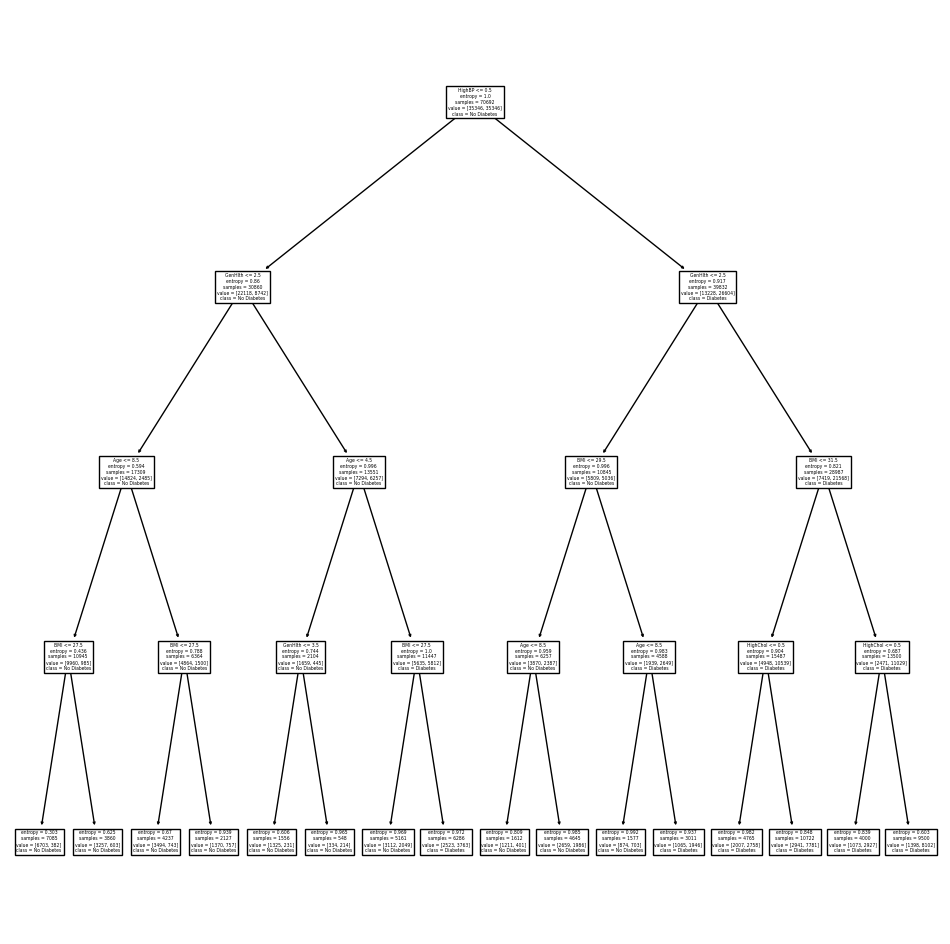

In [131]:
from matplotlib.pyplot import subplots
from sklearn.tree import plot_tree

ax = subplots(figsize=(12,12))[1] 
plot_tree(clf,
          feature_names=feature_names,
          class_names=['No Diabetes', 'Diabetes'], 
          ax=ax);

In [132]:
from sklearn.tree import export_text
print(export_text(clf, 
                  feature_names=feature_names,
                  show_weights=True))


|--- HighBP <= 0.50
|   |--- GenHlth <= 2.50
|   |   |--- Age <= 8.50
|   |   |   |--- BMI <= 27.50
|   |   |   |   |--- weights: [6703.00, 382.00] class: No
|   |   |   |--- BMI >  27.50
|   |   |   |   |--- weights: [3257.00, 603.00] class: No
|   |   |--- Age >  8.50
|   |   |   |--- BMI <= 27.50
|   |   |   |   |--- weights: [3494.00, 743.00] class: No
|   |   |   |--- BMI >  27.50
|   |   |   |   |--- weights: [1370.00, 757.00] class: No
|   |--- GenHlth >  2.50
|   |   |--- Age <= 4.50
|   |   |   |--- GenHlth <= 3.50
|   |   |   |   |--- weights: [1325.00, 231.00] class: No
|   |   |   |--- GenHlth >  3.50
|   |   |   |   |--- weights: [334.00, 214.00] class: No
|   |   |--- Age >  4.50
|   |   |   |--- BMI <= 27.50
|   |   |   |   |--- weights: [3112.00, 2049.00] class: No
|   |   |   |--- BMI >  27.50
|   |   |   |   |--- weights: [2523.00, 3763.00] class: Yes
|--- HighBP >  0.50
|   |--- GenHlth <= 2.50
|   |   |--- BMI <= 29.50
|   |   |   |--- Age <= 8.50
|   |   |   |   |-

In [133]:
import sklearn.model_selection as skm

validation = skm.ShuffleSplit(n_splits=1, 
                              test_size=200,
                              random_state=0)
results = skm.cross_validate(clf,
                             D,
                             Diabetes,
                             cv=validation)
results['test_score']

array([0.655])

In [134]:
(X_train, X_test, Diabetes_train, Diabetes_test) = skm.train_test_split(X,
                                                                Diabetes, 
                                                                test_size=0.5, 
                                                                random_state=0)

In [135]:
clf = DTC(criterion='entropy', random_state=0) 
clf.fit(X_train, Diabetes_train)
accuracy_score(Diabetes_test, clf.predict(X_test))

0.6607819838171222

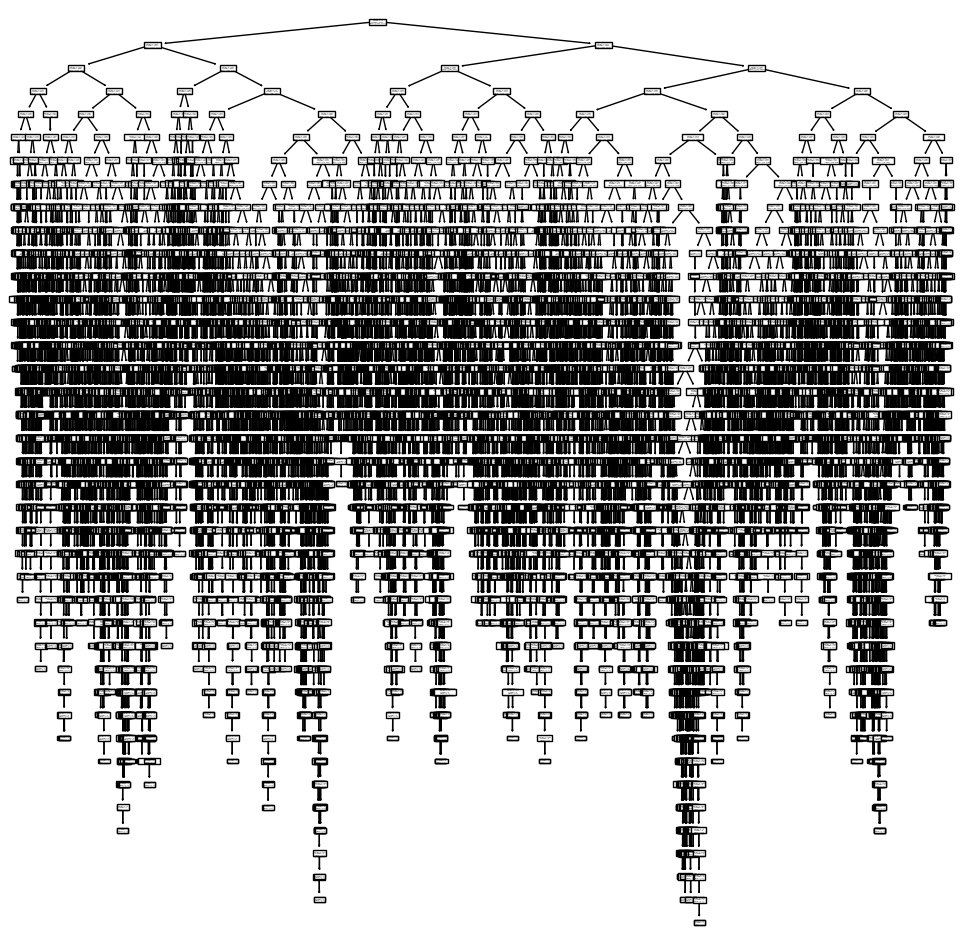

In [136]:
ax = subplots(figsize=(12,12))[1] 
plot_tree(clf,
          feature_names=feature_names, 
          ax=ax);

In [137]:
print(export_text(clf, 
                  feature_names=feature_names,
                  show_weights=True))

|--- HighBP <= 0.50
|   |--- GenHlth <= 2.50
|   |   |--- Age <= 6.50
|   |   |   |--- BMI <= 28.50
|   |   |   |   |--- GenHlth <= 1.50
|   |   |   |   |   |--- BMI <= 23.50
|   |   |   |   |   |   |--- PhysActivity <= 0.50
|   |   |   |   |   |   |   |--- Income <= 7.50
|   |   |   |   |   |   |   |   |--- weights: [30.00, 0.00] class: No
|   |   |   |   |   |   |   |--- Income >  7.50
|   |   |   |   |   |   |   |   |--- Age <= 3.50
|   |   |   |   |   |   |   |   |   |--- Veggies <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: Yes
|   |   |   |   |   |   |   |   |   |--- Veggies >  0.50
|   |   |   |   |   |   |   |   |   |   |--- Age <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Age >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: No
|   |   |   |   |   |   |   |   |--- Age >  3.50
|   |   |   |   |   |   |   |   |   |--- w

In [138]:
clf.tree_.n_leaves

9896

In [91]:
ccp_path = clf.cost_complexity_pruning_path(X_train, Diabetes_train) 
kfold = skm.KFold(10, random_state=1, shuffle=True)